In [16]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

Triangle shape: (4, 2)
Homogeneous Triangle shape: (4, 3)
axs shape: (6,)


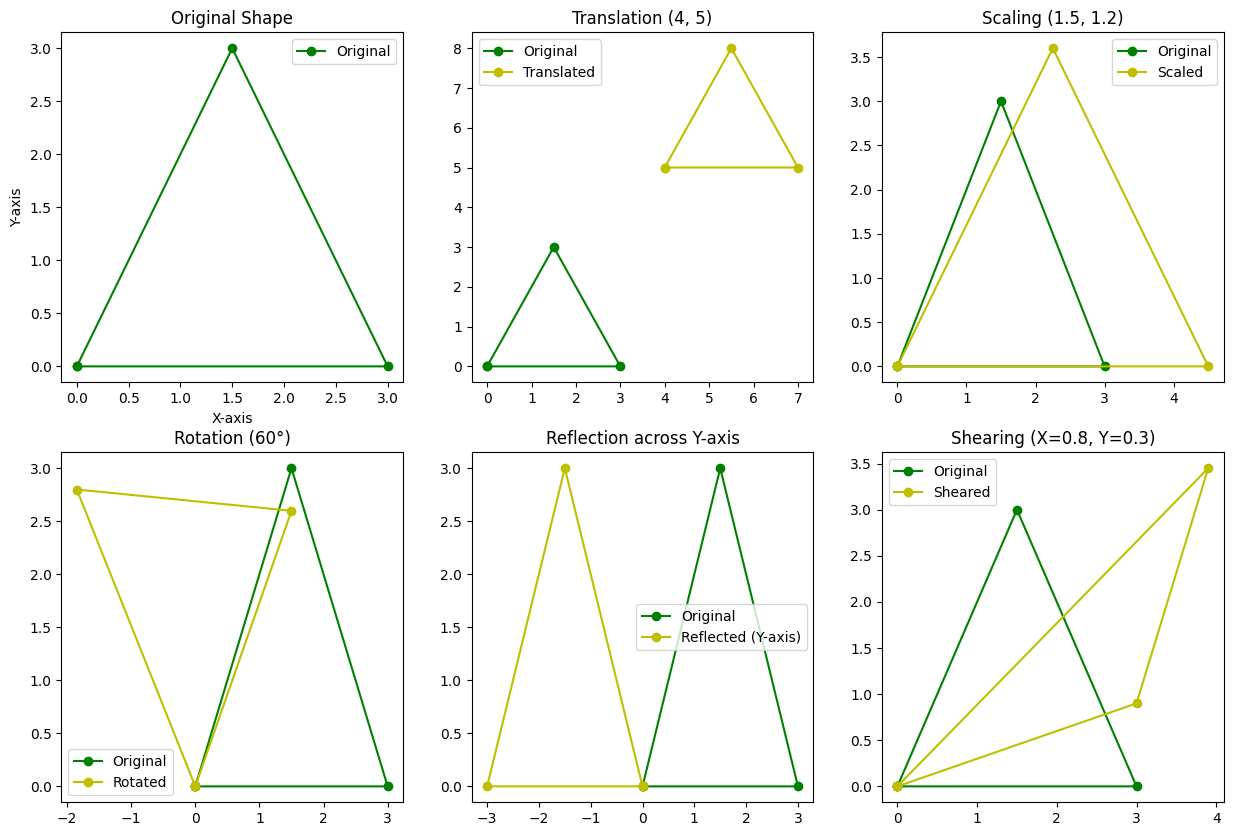

In [17]:
# Define the original shape (Triangle)
triangle = np.array([[0, 0], [3, 0], [1.5, 3], [0, 0]])  # Updated triangle coordinates for a larger triangle
print("Triangle shape:", triangle.shape)

# Homogeneous coordinates for the triangle
homogeneous_triangle = np.c_[triangle, np.ones(len(triangle))]
print("Homogeneous Triangle shape:", homogeneous_triangle.shape)

# Create subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.ravel()  # Flatten the axes for easier indexing
print("axs shape:", axs.shape)

# Original Shape
axs[0].plot(triangle[:, 0], triangle[:, 1], 'go-', label="Original")
axs[0].set_title("Original Shape")
axs[0].set_xlabel("X-axis")
axs[0].set_ylabel("Y-axis")
axs[0].legend()

# 1. Translation
tx, ty = 4, 5  # Updated translation values
translation_matrix = np.array([[1, 0, tx], [0, 1, ty], [0, 0, 1]])
translated_triangle = np.dot(homogeneous_triangle, translation_matrix.T)
axs[1].plot(triangle[:, 0], triangle[:, 1], 'go-', label="Original")
axs[1].plot(translated_triangle[:, 0], translated_triangle[:, 1], 'yo-', label="Translated")
axs[1].set_title("Translation (4, 5)")
axs[1].legend()

# 2. Scaling
sx, sy = 1.5, 1.2  # Updated scaling factors
scaling_matrix = np.array([[sx, 0, 0], [0, sy, 0], [0, 0, 1]])
scaled_triangle = np.dot(homogeneous_triangle, scaling_matrix.T)
axs[2].plot(triangle[:, 0], triangle[:, 1], 'go-', label="Original")
axs[2].plot(scaled_triangle[:, 0], scaled_triangle[:, 1], 'yo-', label="Scaled")
axs[2].set_title("Scaling (1.5, 1.2)")
axs[2].legend()

# 3. Rotation
angle = 60  # Updated rotation angle
rad = np.radians(angle)
rotation_matrix = np.array([[np.cos(rad), -np.sin(rad), 0],
                            [np.sin(rad), np.cos(rad), 0],
                            [0, 0, 1]])
rotated_triangle = np.dot(homogeneous_triangle, rotation_matrix.T)
axs[3].plot(triangle[:, 0], triangle[:, 1], 'go-', label="Original")
axs[3].plot(rotated_triangle[:, 0], rotated_triangle[:, 1], 'yo-', label="Rotated")
axs[3].set_title("Rotation (60°)")
axs[3].legend()

# 4. Reflection (Y-axis)
reflection_matrix_y = np.array([[-1, 0, 0], [0, 1, 0], [0, 0, 1]])  # Updated to reflect across Y-axis
reflected_triangle = np.dot(homogeneous_triangle, reflection_matrix_y.T)
axs[4].plot(triangle[:, 0], triangle[:, 1], 'go-', label="Original")
axs[4].plot(reflected_triangle[:, 0], reflected_triangle[:, 1], 'yo-', label="Reflected (Y-axis)")
axs[4].set_title("Reflection across Y-axis")
axs[4].legend()

# 5. Shearing
shx, shy = 0.8, 0.3  # Updated shearing values
shearing_matrix = np.array([[1, shx, 0], [shy, 1, 0], [0, 0, 1]])
sheared_triangle = np.dot(homogeneous_triangle, shearing_matrix.T)
axs[5].plot(triangle[:, 0], triangle[:, 1], 'go-', label="Original")
axs[5].plot(sheared_triangle[:, 0], sheared_triangle[:, 1], 'yo-', label="Sheared")
axs[5].set_title("Shearing (X=0.8, Y=0.3)")
axs[5].legend()

# Adjust layout and show the plot
plt.show()


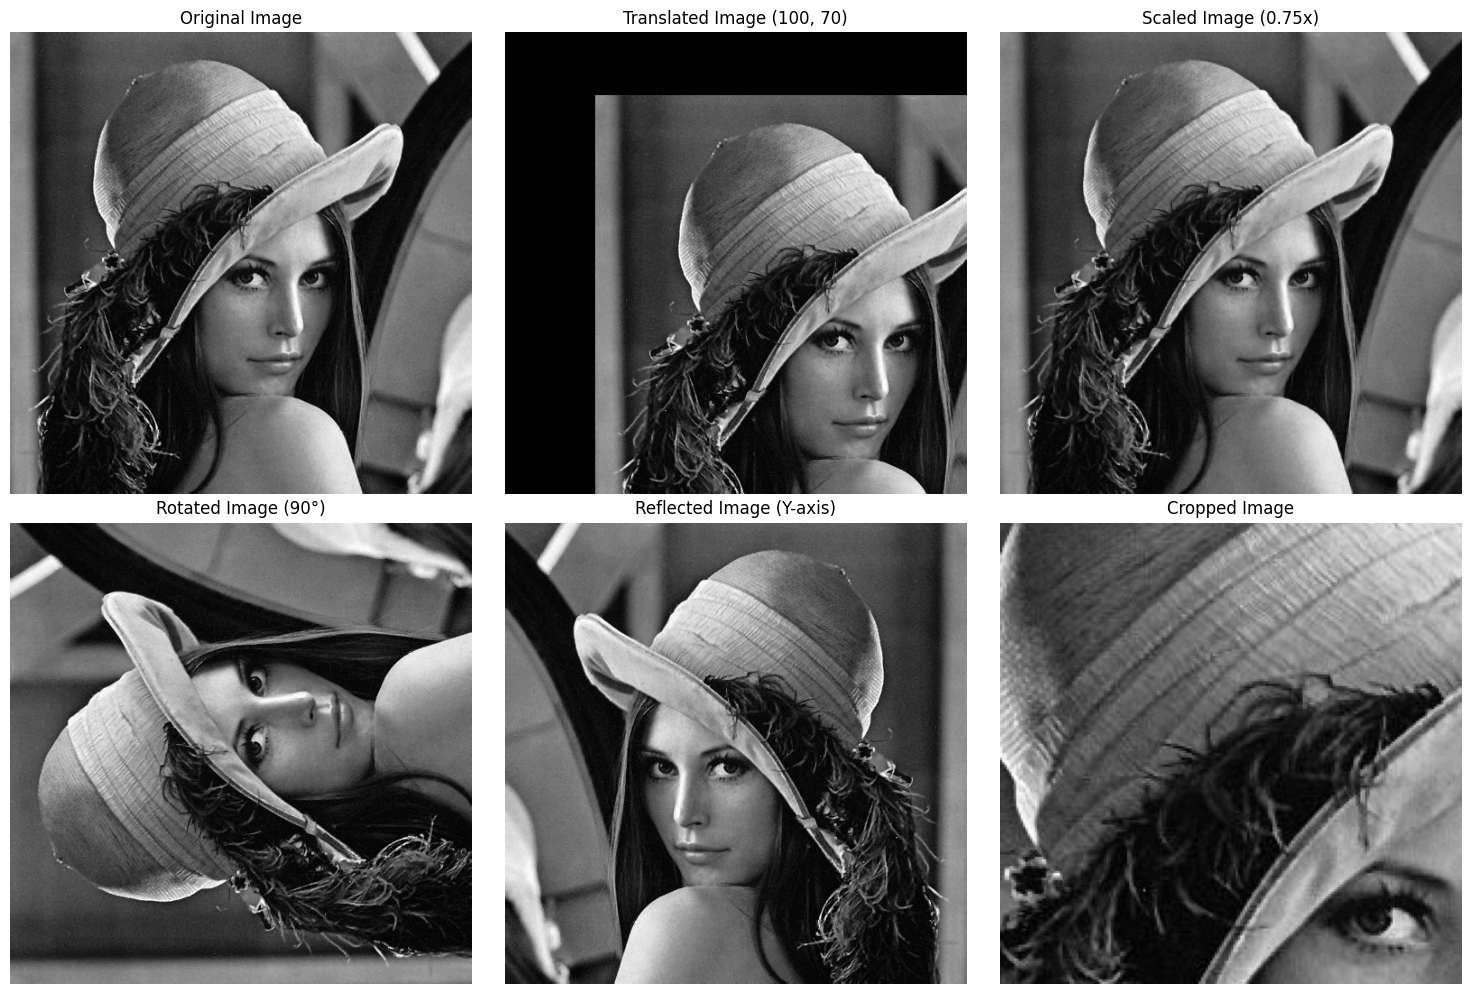

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load Image
image = cv2.imread('Picture1.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Prepare Subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.ravel()  # Flatten axes for easy iteration

# Original Image
axs[0].imshow(image)
axs[0].set_title("Original Image")
axs[0].axis('off')

# *1. Image Translation*
height, width = image.shape[:2]
tx, ty = 100, 70  # Updated translation values
translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
translated_image = cv2.warpAffine(image, translation_matrix, (width, height))

axs[1].imshow(translated_image)
axs[1].set_title("Translated Image (100, 70)")
axs[1].axis('off')

# *2. Scaling*
fx, fy = 0.75, 0.75  # Updated scaling values
scaled_image = cv2.resize(image, None, fx=fx, fy=fy, interpolation=cv2.INTER_LINEAR)

axs[2].imshow(scaled_image)
axs[2].set_title("Scaled Image (0.75x)")
axs[2].axis('off')

# *3. Rotation*
angle = 90  # Updated rotation angle
rotation_matrix = cv2.getRotationMatrix2D((width // 2, height // 2), angle, 1)
rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))

axs[3].imshow(rotated_image)
axs[3].set_title("Rotated Image (90°)")
axs[3].axis('off')

# *4. Reflection (Flip)*
reflected_image_y = cv2.flip(image, 1)  # Flip horizontally (Y-axis)

axs[4].imshow(reflected_image_y)
axs[4].set_title("Reflected Image (Y-axis)")
axs[4].axis('off')

# *5. Cropping*
x1, y1, x2, y2 = 100, 100, 300, 300  # Updated cropping coordinates
cropped_image = image[y1:y2, x1:x2]

axs[5].imshow(cropped_image)
axs[5].set_title("Cropped Image")
axs[5].axis('off')

# Adjust Layout and Display
plt.tight_layout()
plt.show()
